In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
local_df = pd.read_csv("../measurements/local/map.csv")
map_df = pd.read_csv("../measurements/JPEG_manager_sparsity/map.csv")
cha_df = pd.read_csv("../measurements/JPEG_manager_sparsity/characteristic.csv")

static_map_df = pd.read_csv("../measurements/jpeg_no_change/map.csv")
static_cha_df = pd.read_csv("../measurements/jpeg_no_change/characteristic.csv")

In [3]:
map_df.head()

,pruning_thresh,target_sparsity,quality,technique,bandwidth,mAP_drop,frame_id,feasible,sensitivity,map
0,0.001,0.1,86,1,2.498029e+07,40,1,1,1.0,1.000000
1,0.011,0.1,73,1,2.492123e+07,40,2,1,1.0,0.666667
2,0.011,0.1,69,1,2.482305e+07,40,3,1,1.0,0.750000
3,0.011,0.1,72,1,2.468615e+07,40,4,1,1.0,0.600000
4,0.011,0.1,72,1,2.451106e+07,40,5,1,1.0,0.571429


# Configuration

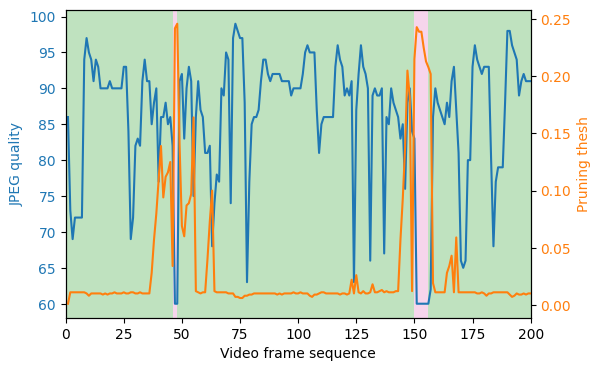

In [4]:
fig, ax1 = plt.subplots(figsize=(6,4))

color = 'tab:blue'
ax1.set_xlabel('Video frame sequence')
ax1.set_ylabel('JPEG quality', color=color)

ax1.tick_params(axis='y', labelcolor=color)

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        ax1.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        ax1.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["quality"].to_numpy(),color=color)

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Pruning thesh', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["pruning_thresh"].to_numpy(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_config.pdf")
# ax3 = ax2.twinx() 
# color = 'tab:purple'
# ax3.set_ylabel('Bandwidth [Mbps]', color=color)  # we already handled the x-label with ax1
# ax3.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# mAP drop

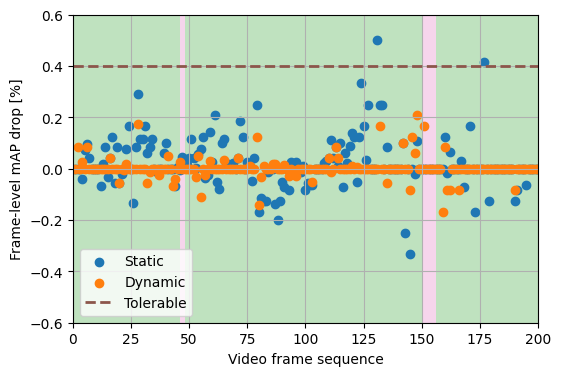

In [5]:

plt.figure(figsize=(6,4))

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


plt.scatter(static_map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - static_map_df["map"].to_numpy(),label="Static")
plt.scatter(map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - map_df["map"].to_numpy(),label="Dynamic")
plt.axhline(y=0.4, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")



plt.ylim([-0.6,0.6])
plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Frame-level mAP drop [%]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_map_drop.pdf")

In [6]:
temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

temp.std()

0.09594034113954739

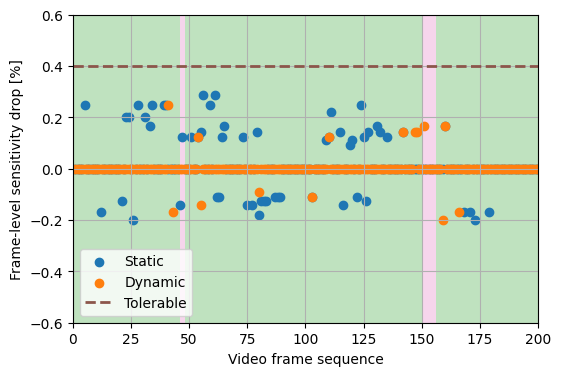

In [7]:
plt.figure(figsize=(6,4))

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


plt.scatter(static_map_df["frame_id"].to_numpy(),local_df["sensitivity"].to_numpy() - static_map_df["sensitivity"].to_numpy(),label="Static")
plt.scatter(map_df["frame_id"].to_numpy(),local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy(),label="Dynamic")
plt.axhline(y=0.4, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")



plt.ylim([-0.6,0.6])
plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Frame-level sensitivity drop [%]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_sensitivity_drop.pdf")

In [8]:
temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

temp.std()

0.04161536977159337

# Compression ratio

In [9]:
raw_tensor_size = 128*26*26*4 # bytes
cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

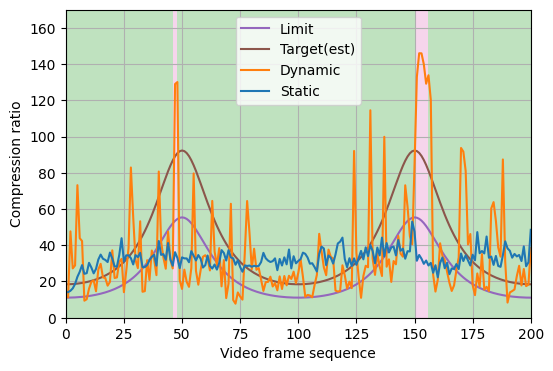

In [10]:
plt.figure(figsize=(6,4))


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="Dynamic")
plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")

plt.ylim([0,170])
plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Compression ratio")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_cmp_ratio.pdf")

# Bandwidth

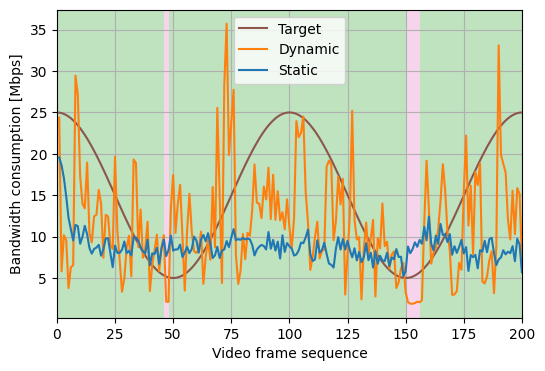

In [11]:
plt.figure(figsize=(6,4))


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:brown",label="Target")
plt.plot(cha_df["frame_id"].to_numpy(),(cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:orange",label="Dynamic")
plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")

plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Bandwidth consumption [Mbps]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_bandwidth.pdf")

# SNR

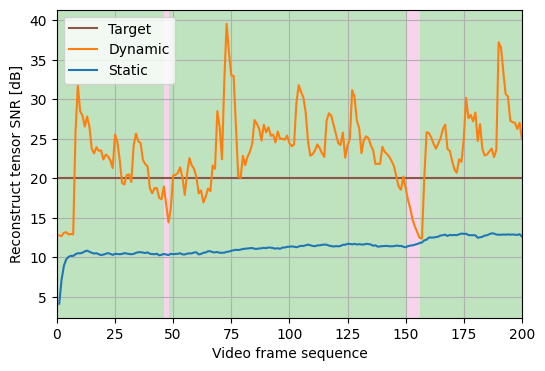

In [12]:
plt.figure(figsize=(6,4))


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_snr"],color="tab:brown",label="Target")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:orange",label="Dynamic")
plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

plt.legend()
plt.grid()
plt.xlabel("Video frame sequence")
plt.ylabel("Reconstruct tensor SNR [dB]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_snr.pdf")